In [1]:
import gzip, json, random, pandas as pd

df = pd.read_csv('../Data/phone_reviews.csv')
df = df[['REVIEWBODY', 'REVIEWRATING_adj']]
df.head()
df.head()
df_1 = df[df['REVIEWRATING_adj']==1.0].values.tolist()
df_2 = df[df['REVIEWRATING_adj']==2.0].values.tolist()
df_3 = df[df['REVIEWRATING_adj']==3.0].values.tolist()
df_4 = df[df['REVIEWRATING_adj']==4.0].values.tolist()
df_5 = df[df['REVIEWRATING_adj']==5.0].values.tolist()
df1 = random.sample(df_1, 101)
df2 = random.sample(df_2, 101)
df3 = random.sample(df_3, 101)
df4 = random.sample(df_4, 101)
df5 = random.sample(df_5, 101)
df11 = pd.DataFrame(df1[1:], columns=['reviewText', 'overall'])
df12 = pd.DataFrame(df2[1:], columns=['reviewText', 'overall'])
df13 = pd.DataFrame(df3[1:], columns=['reviewText', 'overall'])
df14 = pd.DataFrame(df4[1:], columns=['reviewText', 'overall'])
df15 = pd.DataFrame(df5[1:], columns=['reviewText', 'overall'])
schema = pd.concat([df11, df12, df13, df14, df15])

In [3]:
input_file = '../Data/reviews_Cell_Phones_and_Accessories_5.json.gz'

data = []
with gzip.open(input_file) as f:
    for l in f:
        data.append(json.loads(l.strip()))
df = pd.DataFrame.from_dict(data)
ama_df = df[['reviewText', 'overall']]

df.head()
df_1 = ama_df[ama_df['overall']==1.0].values.tolist()
df_2 = ama_df[ama_df['overall']==2.0].values.tolist()
df_3 = ama_df[ama_df['overall']==3.0].values.tolist()
df_4 = ama_df[ama_df['overall']==4.0].values.tolist()
df_5 = ama_df[ama_df['overall']==5.0].values.tolist()
df1 = random.sample(df_1, 101)
df2 = random.sample(df_2, 101)
df3 = random.sample(df_3, 101)
df4 = random.sample(df_4, 101)
df5 = random.sample(df_5, 101)
df11 = pd.DataFrame(df1[1:], columns=['reviewText', 'overall'])
df12 = pd.DataFrame(df2[1:], columns=['reviewText', 'overall'])
df13 = pd.DataFrame(df3[1:], columns=['reviewText', 'overall'])
df14 = pd.DataFrame(df4[1:], columns=['reviewText', 'overall'])
df15 = pd.DataFrame(df5[1:], columns=['reviewText', 'overall'])
amazon = pd.concat([df11, df12, df13, df14, df15])

In [4]:
all = pd.concat([schema, amazon])
text = all['reviewText']
target = all['overall']



Training and prediction done
Training target statistics: Counter({5.0: 183, 2.0: 181, 1.0: 180, 3.0: 179, 4.0: 177})
Testing target statistics: Counter({4.0: 23, 3.0: 21, 1.0: 20, 2.0: 19, 5.0: 17})
train: 0.9/ test: 0.1
Accuracy:0.39
Precision:0.39752904989747095
F1:0.37686065814811653
col_0    1.0  2.0  3.0  4.0  5.0
overall                         
1.0        9    2    5    3    1
2.0        7    2    1    7    2
3.0        1    4   12    4    0
4.0        1    3    8   10    1
5.0        1    0    6    4    6
Training and prediction done
Training target statistics: Counter({3.0: 169, 2.0: 168, 1.0: 158, 4.0: 155, 5.0: 150})
Testing target statistics: Counter({5.0: 50, 4.0: 45, 1.0: 42, 2.0: 32, 3.0: 31})
train: 0.8/ test: 0.2
Accuracy:0.39
Precision:0.4396507483962936
F1:0.3790206800927468
col_0    1.0  2.0  3.0  4.0  5.0
overall                         
1.0       14    1   17   10    0
2.0        7    5    6   13    1
3.0        2    3   17    8    1
4.0        3    6   13   22   

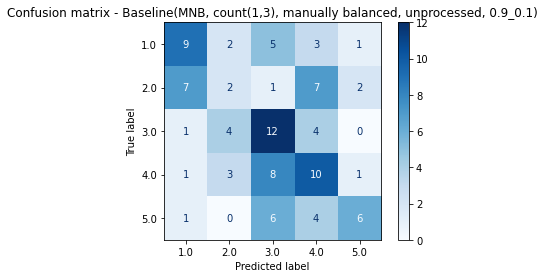

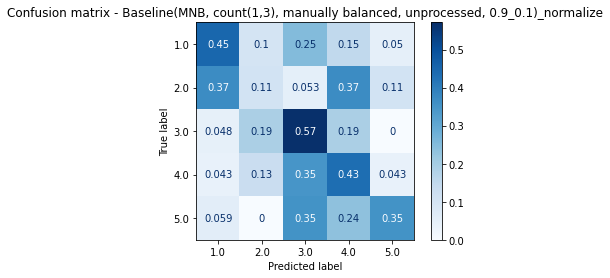

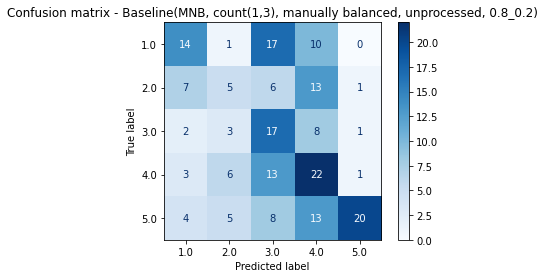

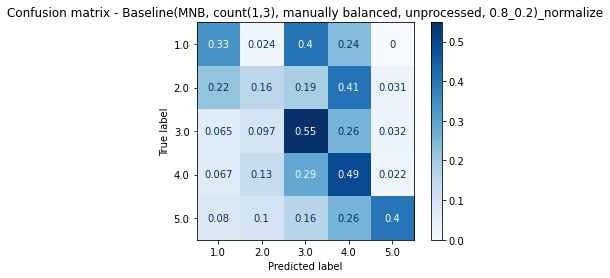

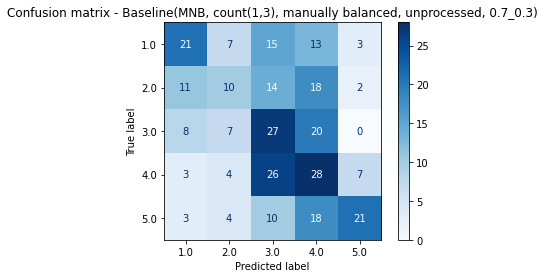

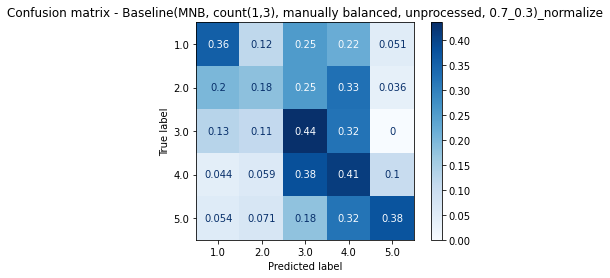

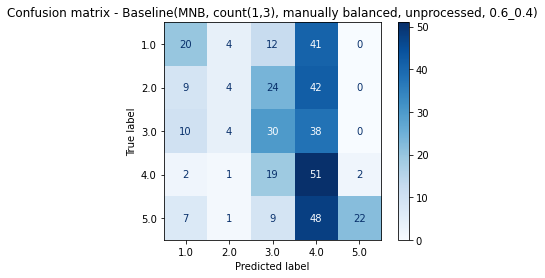

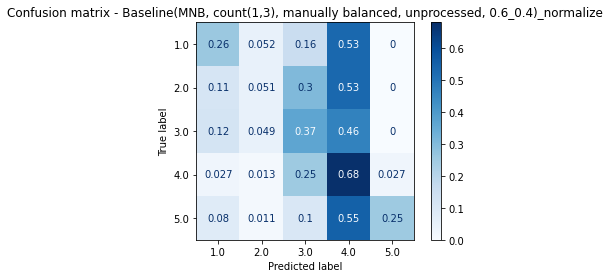

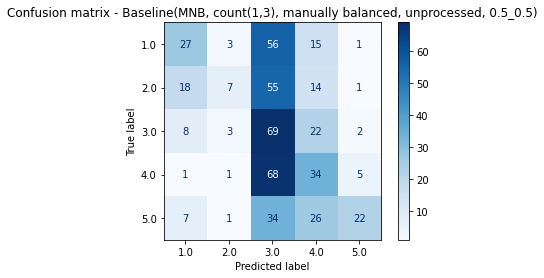

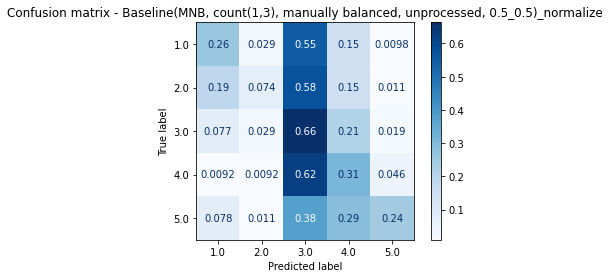

In [6]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


cv = CountVectorizer(ngram_range=(1,3))
cv.fit(text)
text_count= cv.transform(text)

nb = MultinomialNB()


list_test = [0.1, 0.2, 0.3, 0.4, 0.5]
for i in list_test:
    # Split dataset into training set and test set
    test_size = i
    train_size = 1 - i
    X_train, X_test, y_train, y_test = train_test_split(text_count, target, test_size=i,random_state=None)

    # Train the model using the training sets
    nb.fit(X_train, y_train)
    #Predict the response for test dataset
    y_pred = nb.predict(X_test)
    print("Training and prediction done")
    print('Training target statistics: {}'.format(Counter(y_train), sorted(y_train)))
    print('Testing target statistics: {}'.format(Counter(y_test), sorted(y_test)))

    # Model Accuracy, how often is the classifier correct?
    print("train: " + str(train_size) + "/ test: " + str(test_size))
    accuracy = str(metrics.accuracy_score(y_test, y_pred))
    precision = str(metrics.precision_score(y_test, y_pred, average="macro"))
    f1 = str(metrics.f1_score(y_test, y_pred, average="macro"))
    print("Accuracy:" + accuracy)
    print("Precision:" + precision)
    print("F1:" + f1)
    print(pd.crosstab(y_test, y_pred))

    # Visualization of Confusion Matrix and saving
    plt.rcParams['figure.facecolor'] = 'white'
    title = f"Confusion matrix - Baseline(MNB, count(1,3), manually balanced, unprocessed, {train_size}_{test_size})"
    disp = plot_confusion_matrix(nb, X_test, y_test,
                                 display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)
    plt.show()

    title_norm = title + "_normalize"
    disp_norm = plot_confusion_matrix(nb, X_test, y_test,
                                 display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    disp_norm.ax_.set_title(title_norm)
    plt.show()
